1.このSprintについて

Sprintの目的
- データセットを作成し学習する
- データ拡張を行う


どのように学ぶか

自作のデータセットを作り、さらにデータ拡張も行なっていきます。



2.自作データセットの学習

自作のデータセットに対して分類および物体検出を行っていきます。具体的なタスクは講師からの指示に従ってください。

### 【問題1】自作データセットでの分類の学習

自作のデータセットに対して分類問題を解いてください。任意の実装を使用してください。

In [361]:
# カレントディレクトリの変更
import os
#os.chdir('/content/drive/My Drive/Sprint18/')

# カレントディレクトリの取得
print(os.getcwd())

/Users/takahiromotoki/DIC/Sprint/Term2/Sprint18


In [362]:
import os
import glob
import re

import matplotlib.pyplot as plt
from PIL import Image

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
import keras

from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.optimizers import Adam
from keras.layers import GlobalAveragePooling2D

from keras.layers.core import Dense, Activation, Dropout, Flatten



#from keras import backend as K
#from tensorflow.keras.models import Sequential
#from keras.layers.core import Dense
#from keras.optimizers import Adam
#from keras.callbacks import CSVLogger

In [363]:
tf.__version__, keras.__version__

('2.3.0', '2.4.3')

In [364]:
# イメージのディレクトリ
img_path ="./img"
img_files = os.listdir(img_path)

In [365]:
!ls -a ./img

.           cat.16.jpg  cat.4.jpg   dog.117.jpg dog.213.jpg dog.90.jpg
..          cat.16.xml  cat.4.xml   dog.117.xml dog.213.xml dog.90.xml
cat.1.jpg   cat.34.jpg  cat.77.jpg  dog.119.jpg dog.84.jpg
cat.1.xml   cat.34.xml  cat.77.xml  dog.119.xml dog.84.xml


In [366]:
img_files

['dog.213.xml',
 'dog.213.jpg',
 'cat.4.jpg',
 'cat.4.xml',
 'cat.1.jpg',
 'cat.1.xml',
 'cat.34.jpg',
 'cat.34.xml',
 'dog.84.xml',
 'dog.90.xml',
 'dog.84.jpg',
 'dog.90.jpg',
 'dog.117.xml',
 'dog.117.jpg',
 'dog.119.jpg',
 'dog.119.xml',
 'cat.77.xml',
 'cat.77.jpg',
 'cat.16.jpg',
 'cat.16.xml']

In [367]:
img_list = glob.glob(img_path + '/*' + ".jpg")
img_list

['./img/dog.213.jpg',
 './img/cat.4.jpg',
 './img/cat.1.jpg',
 './img/cat.34.jpg',
 './img/dog.84.jpg',
 './img/dog.90.jpg',
 './img/dog.117.jpg',
 './img/dog.119.jpg',
 './img/cat.77.jpg',
 './img/cat.16.jpg']

In [368]:
# np.resizeはだめ、ぜったい

dog_img_array = np.empty((0,224,224,3))
cat_img_array = np.empty((0,224,224,3))

for img in img_list:
    
    # ファイル名に'dog'が含まれるイメージ
    if re.search('dog', img):
        
        dog_img_ = Image.open(img)

        # サイズを揃える
        dog_img_ = dog_img_.resize((224, 224))

        # PIL.Image.Imageからnumpy配列へ
        dog_img = np.array(dog_img_)

        # 正規化
        dog_img = dog_img / 255.

        # axisの追加
        dog_img = dog_img.reshape((1,224,224,3))

        dog_img_array = np.concatenate([dog_img_array, dog_img], axis = 0)

        dog_img_.close()
    
    # ファイル名に'cat'が含まれるイメージ
    if re.search('cat', img):
        
        cat_img_ = Image.open(img)
        
        cat_img_ = cat_img_.resize((224, 224))
        
        cat_img = np.array(cat_img_)
        
        cat_img = cat_img / 255.
        
        cat_img = cat_img.reshape((1,224,224,3))
        
        cat_img_array = np.concatenate([cat_img_array, cat_img], axis = 0)
        
        cat_img_.close()

In [369]:
print('dog_image:{}  cat_image:{}'.format(dog_img_array.shape, cat_img_array.shape))

dog_image:(5, 224, 224, 3)  cat_image:(5, 224, 224, 3)


In [370]:
# 配列のまま出力

print('データ型:', cat_img_array[3].dtype)

cat_img_array[3]

データ型: float64


array([[[0.09019608, 0.02745098, 0.03137255],
        [0.09019608, 0.02745098, 0.03137255],
        [0.09019608, 0.02745098, 0.03137255],
        ...,
        [0.41960784, 0.45882353, 0.49803922],
        [0.03529412, 0.0627451 , 0.09411765],
        [0.0627451 , 0.06666667, 0.0745098 ]],

       [[0.09019608, 0.02745098, 0.03137255],
        [0.09019608, 0.02745098, 0.03137255],
        [0.09019608, 0.02745098, 0.03137255],
        ...,
        [0.42352941, 0.4627451 , 0.50196078],
        [0.03921569, 0.06666667, 0.09803922],
        [0.0627451 , 0.06666667, 0.0745098 ]],

       [[0.09019608, 0.02745098, 0.03137255],
        [0.09019608, 0.02745098, 0.03137255],
        [0.09019608, 0.02745098, 0.03137255],
        ...,
        [0.41960784, 0.45882353, 0.49803922],
        [0.02745098, 0.05490196, 0.08627451],
        [0.05490196, 0.05882353, 0.06666667]],

       ...,

       [[0.09019608, 0.02745098, 0.03137255],
        [0.09019608, 0.02745098, 0.03137255],
        [0.09019608, 0

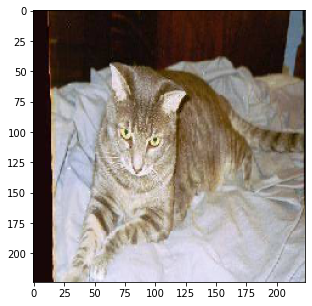

In [371]:
# 配列を画像として出力

plt.rcParams['figure.figsize'] = (5.0, 5.0)

plt.imshow(cat_img_array[3])

plt.show()

In [372]:
X = np.concatenate([dog_img_array, cat_img_array], axis = 0)
X.shape

(10, 224, 224, 3)

In [373]:
y = np.array(["dog", "dog", "dog", "dog", "dog", "cat", "cat", "cat", "cat", "cat"])
#y = y[:, np.newaxis]
y.shape

(10,)

In [374]:
#ラベルエンコーディング
le = LabelEncoder()
y = le.fit_transform(y)

In [375]:
# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [376]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape

((6, 224, 224, 3), (6,), (2, 224, 224, 3), (2,), (2, 224, 224, 3), (2,))

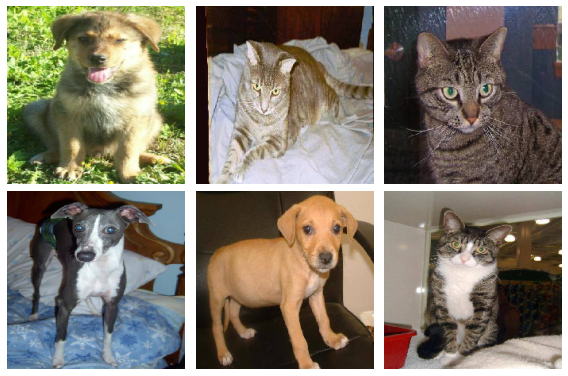

In [377]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(8, 6))

for indx, axis in enumerate(axes.flatten()):
  imgplot = axis.imshow(X_train[indx])
  axis.set_axis_off()
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [378]:
X_train.shape[0], X_train.shape[1], X_train.shape[2], X_train.shape[3]

(6, 224, 224, 3)

In [379]:
# ハイパーパラメータの設定
learning_rate = 0.03
batch_size = 1
num_epochs = 10

img_width = X_train.shape[1]
img_height = X_train.shape[2]
img_channel = X_train.shape[3]

#n_hidden1 = 20
#n_hidden2 = 10
n_classes = 1

In [380]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, img_channel)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(n_classes))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer=Adam(learning_rate=learning_rate), 
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
activation_5 (Activation)    (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
activation_6 (Activation)    (None, 109, 109, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 52, 52, 64)       

In [381]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size, epochs=num_epochs,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/10
6/6 [==============================] - 0s 53ms/step - loss: 1845.5411 - accuracy: 0.5000 - val_loss: 2172.5361 - val_accuracy: 0.5000
Epoch 2/10
6/6 [==============================] - 0s 41ms/step - loss: 769.2723 - accuracy: 0.5000 - val_loss: 32.2634 - val_accuracy: 0.5000
Epoch 3/10
6/6 [==============================] - 0s 36ms/step - loss: 11.1904 - accuracy: 0.3333 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/10
6/6 [==============================] - 0s 35ms/step - loss: 0.6955 - accuracy: 0.0000e+00 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/10
6/6 [==============================] - 0s 38ms/step - loss: 0.6975 - accuracy: 0.5000 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 6/10
6/6 [==============================] - 0s 38ms/step - loss: 0.6954 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/10
6/6 [==============================] - 0s 37ms/step - loss: 0.6964 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 8/10
6/

In [382]:
y_pred_proba = model.predict(X_test)[:, 0]
y_pred = np.where(y_pred_proba > 0.5, 1, 0)

print("y_pred_proba", y_pred_proba)
print("y_pred", y_pred)

y_pred_proba [0.49540356 0.49540824]
y_pred [0 0]


In [383]:
score = model.evaluate(X_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6931940913200378
Test accuracy: 0.5


### 【問題2】分類データセットに対するデータ拡張

データ拡張（Data Augmentation）を行ってください。

In [26]:
pip install albumentations

     |████████████████████████████████| 122kB 1.3MB/s eta 0:00:01
     |████████████████████████████████| 952kB 994kB/s eta 0:00:01
     |████████████████████████████████| 43.4MB 2.5MB/s eta 0:00:01
     |████████████████████████████████| 52.3MB 3.8MB/s eta 0:00:01
     |████████████████████████████████| 1.0MB 89kB/s eta 0:00:0101
  Created wheel for albumentations: filename=albumentations-0.4.6-cp37-none-any.whl size=65171 sha256=ecfcca6edd2ad7e3e990cbbb70dc506ab13361c85939ae56cc14411fac3ea9a1
  Stored in directory: /Users/takahiromotoki/Library/Caches/pip/wheels/c7/f4/89/56d1bee5c421c36c1a951eeb4adcc32fbb82f5344c086efa14
Successfully built albumentations
Note: you may need to restart the kernel to use updated packages.


In [28]:
import albumentations as A

In [29]:
def data_augmentation(img):
  transform = A.Compose([
      A.HorizontalFlip(p=0.5),
      A.ShiftScaleRotate(p=0.5),])
  augmented_image = transform(image=img)['image']
  return augmented_image

In [30]:
aug_img = []
for i in range(len(X)):
  augmented_image = data_augmentation(X[i])
  aug_img.append(augmented_image)

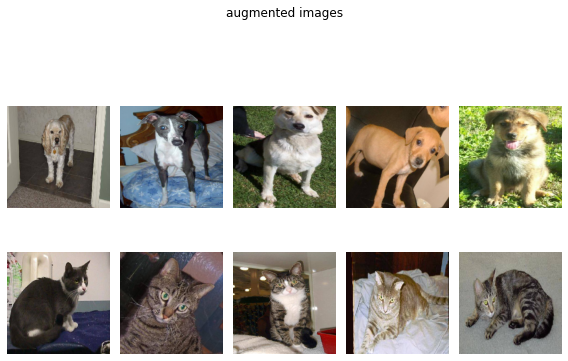

In [31]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(8, 6))

for indx, axis in enumerate(axes.flatten()):
  imgplot = axis.imshow(aug_img[indx])
  axis.set_axis_off()
fig.suptitle("augmented images")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

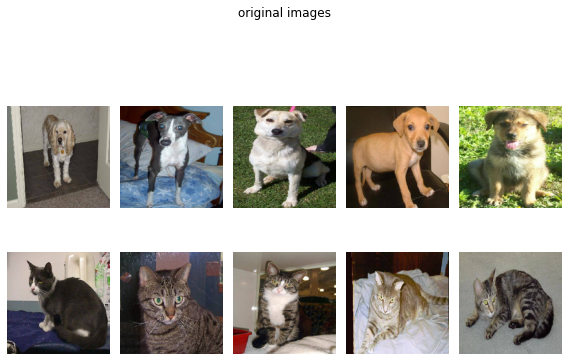

In [32]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(8, 6))

for indx, axis in enumerate(axes.flatten()):
  imgplot = axis.imshow(X[indx])
  axis.set_axis_off()
fig.suptitle("original images")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

### 【問題3】物体検出データセットの用意

次に、物体検出を行います。バウンディングボックスのアノテーションを行い物体検出のためのデータセットを作成してください。

In [34]:
!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 1669 (delta 3), reused 7 (delta 3), pack-reused 1658
Receiving objects: 100% (1669/1669), 232.69 MiB | 4.53 MiB/s, done.
Resolving deltas: 100% (992/992), done.


In [38]:
pip install pyqt5 lxml # Install qt and lxml by pip

Note: you may need to restart the kernel to use updated packages.


In [327]:
cd labelImg

/Users/takahiromotoki/DIC/Sprint/Term2/Sprint18/labelImg


In [282]:
pwd

'/Users/takahiromotoki/DIC/Sprint/Term2/Sprint18/labelImg'

In [50]:
!make qt5py3

pyrcc5 -o libs/resources.py resources.qrc


In [328]:
!python labelImg.py

Image:/Users/takahiromotoki/DIC/Sprint/Term2/Sprint18/img/cat.1.jpg -> Annotation:/Users/takahiromotoki/DIC/Sprint/Term2/Sprint18/img/cat.1.xml


### 【問題4】物体検出データセットに対するデータ拡張

データ拡張（Data Augmentation）を行ってください。前述のalbumentationsはバウンディングボックスを合わせての加工が可能です。詳細はREADME.mdを確認してください。

- XMLファイルよりアノテーションデータを生成

In [329]:
cd ..

/Users/takahiromotoki/DIC/Sprint/Term2/Sprint18


In [330]:
file_path ="./img"
xml_list = glob.glob(file_path + '/*' + ".xml")
xml_list

['./img/dog.213.xml',
 './img/cat.4.xml',
 './img/cat.1.xml',
 './img/cat.34.xml',
 './img/dog.84.xml',
 './img/dog.90.xml',
 './img/dog.117.xml',
 './img/dog.119.xml',
 './img/cat.77.xml',
 './img/cat.16.xml']

In [331]:
import xml.etree.ElementTree as ET
import cv2

In [332]:
def get_bndbox_coordinates(xml_list):
    """
    xmlからbounding boxのxmin, ymin, xmax, ymax及びcategory_idを取得する
    """
    bboxes_array = np.empty((0, 5), dtype='int')
    for xml_data in xml_list:
        
        #xmlデータを読み込みます
        tree = ET.parse(xml_data)
        #一番上の階層の要素を取り出します
        root = tree.getroot()
        
        child = root.find("object").find("bndbox")
        
        xmin = child.find("xmin").text
        ymin = child.find("ymin").text
        xmax = child.find("xmax").text
        ymax = child.find("ymax").text

        if re.search('dog', xml_data.split("/")[2]):
            category_id = 0        
        elif re.search('cat', xml_data.split("/")[2]):
            category_id = 1
            
        bndbox_coordinate = np.array([xmin, ymin, xmax, ymax, category_id], dtype='int').reshape(1, 5)      
        bboxes_array = np.concatenate([bboxes_array, bndbox_coordinate], axis=0)
        
    return bboxes_array

In [333]:
bboxes_array = get_bndbox_coordinates(xml_list)

In [334]:
bboxes_array

array([[164,  31, 339, 305,   0],
       [ 92,  31, 493, 363,   1],
       [ 48,  39, 294, 273,   1],
       [ 68,  49, 273, 481,   1],
       [ 39,  26, 297, 499,   0],
       [ 29,  14, 270, 498,   0],
       [ 27,   8, 458, 427,   0],
       [ 21,   6, 264, 399,   0],
       [ 36,  41, 350, 232,   1],
       [ 28,  40, 419, 181,   1]])

- ファイルのパスを取得

In [335]:
file_path ="./img"
img_list = glob.glob(file_path + '/*' + ".jpg")
img_list

['./img/dog.213.jpg',
 './img/cat.4.jpg',
 './img/cat.1.jpg',
 './img/cat.34.jpg',
 './img/dog.84.jpg',
 './img/dog.90.jpg',
 './img/dog.117.jpg',
 './img/dog.119.jpg',
 './img/cat.77.jpg',
 './img/cat.16.jpg']

- データ拡張の実施

In [320]:
BOX_COLOR = (255, 0, 0) # Red
TEXT_COLOR = (255, 255, 255) # White

def visualize_bbox(img, bbox, class_name, color=BOX_COLOR, thickness=2):
    """Visualizes a single bounding box on the image"""
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
   
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(
        img,
        text=class_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35, 
        color=TEXT_COLOR, 
        lineType=cv2.LINE_AA,
    )
    return img


def visualize(image, bboxes, category_ids, category_id_to_name):
    img = image.copy()
    for bbox, category_id in zip(bboxes, category_ids):
        class_name = category_id_to_name[category_id]
        img = visualize_bbox(img, bbox, class_name)
    plt.figure(figsize=(12, 12))
    plt.axis('off')
    plt.imshow(img)

In [336]:
# Load the image from the disk
image = cv2.imread("./img/cat.34.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [347]:
# Define two bounding boxes with coordinates and class labels
bboxes = [[68,  49, 205, 432]]
category_ids = [1]

# We will use the mapping from category_id to the class name
# to visualize the class label for the bounding box on the image
category_id_to_name = {0: 'dog', 1: 'cat'}

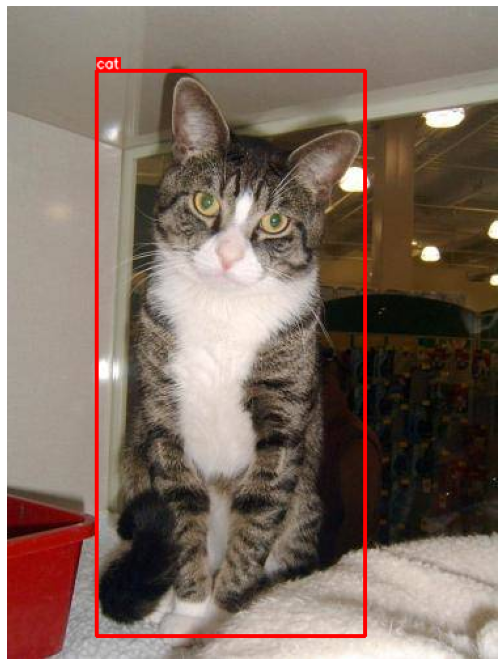

In [348]:
# Visuaize the original image with bounding boxes
visualize(image, bboxes, category_ids, category_id_to_name)

In [349]:
# 水平反転
transform = A.Compose(
    [A.HorizontalFlip(p=0.5)],
    bbox_params=A.BboxParams(format='coco', label_fields=['category_ids']),
)

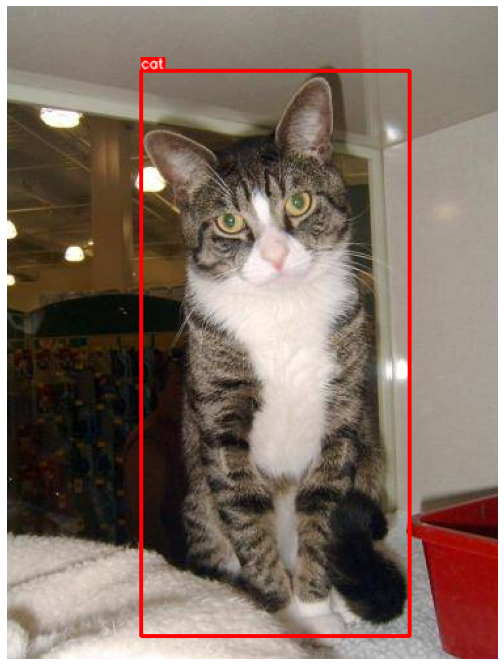

In [350]:
transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
visualize(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,
)

In [351]:
# 垂直反転
transform = A.Compose(
    [A.VerticalFlip(p=1)],
    bbox_params=A.BboxParams(format='coco', label_fields=['category_ids']),
)

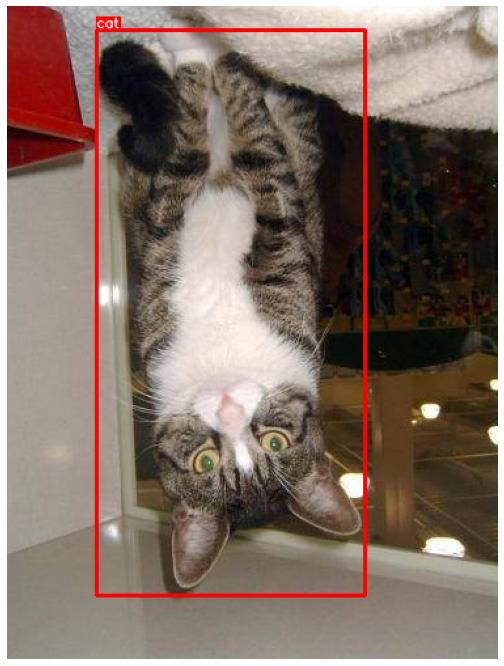

In [352]:
transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
visualize(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,
)

In [357]:
transform = A.Compose(
    [A.ShiftScaleRotate(p=0.3)],
    bbox_params=A.BboxParams(format='coco', label_fields=['category_ids']),
)

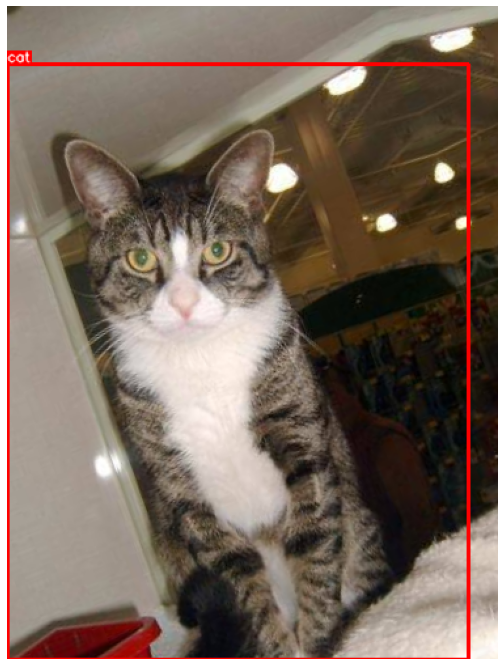

In [358]:
transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
visualize(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,
)

In [359]:
# Define a complex augmentation piepline
transform = A.Compose([
        A.HorizontalFlip(p=0.5),
        A.ShiftScaleRotate(p=0.5),
        A.RandomBrightnessContrast(p=0.3),
        A.RGBShift(r_shift_limit=30, g_shift_limit=30, b_shift_limit=30, p=0.3),
    ],
    bbox_params=A.BboxParams(format='coco', label_fields=['category_ids']),
)

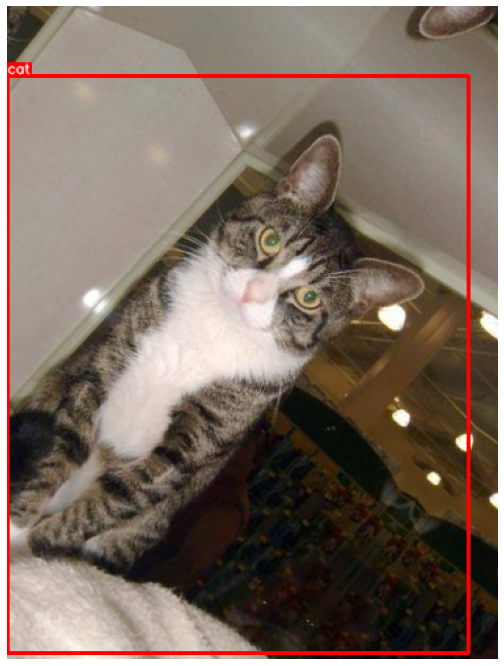

In [360]:
transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
visualize(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,
)